# Sentiment Analysis with Pretrained Glove Model

In [1]:
#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download("punkt")
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd 
data = pd.read_csv("train.tsv",sep = "\t")

In [3]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
data.Sentiment.unique()

array([1, 2, 3, 4, 0], dtype=int64)

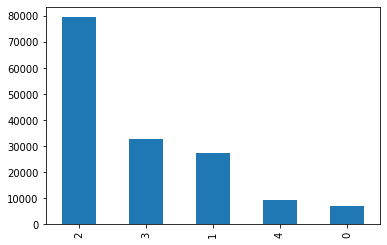

In [5]:
data.Sentiment.value_counts().plot.bar()

In [6]:
data["Sentiment"].replace(0, value = "negatif", inplace = True)
data["Sentiment"].replace(1, value = "negatif", inplace = True)

In [7]:
data["Sentiment"].replace(3, value = "pozitif", inplace = True)
data["Sentiment"].replace(4, value = "pozitif", inplace = True)

In [8]:
data.shape

(156060, 4)

In [9]:
data=data[data["Sentiment"]!=2]

In [10]:
data.shape

(76478, 4)

In [11]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negatif
21,22,1,good for the goose,pozitif
22,23,1,good,pozitif
33,34,1,"the gander , some of which occasionally amuses...",negatif
46,47,1,amuses,pozitif


In [12]:
#data = data[(data.Sentiment == "negatif") | (data.Sentiment == "pozitif")]

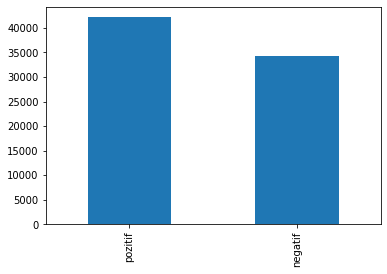

In [13]:
data["Sentiment"].value_counts().plot.bar()

In [14]:
df = pd.DataFrame()
df["sentences"] = data["Phrase"]
df["label"] = data["Sentiment"]

In [15]:
df.head()

,sentences,label
0,A series of escapades demonstrating the adage ...,negatif
21,good for the goose,pozitif
22,good,pozitif
33,"the gander , some of which occasionally amuses...",negatif
46,amuses,pozitif


In [16]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-1000:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [17]:
df.head()

,sentences,label
0,A series of demonstrating the adage that what ...,negatif
21,good for the goose,pozitif
22,good,pozitif
33,"the gander , some of which occasionally amuses...",negatif
46,amuses,pozitif


## Metin Ön İşleme

In [18]:
df.iloc[0]

sentences    A series of demonstrating the adage that what ...
label                                                  negatif
Name: 0, dtype: object

**Word Embedding**

In [19]:
import numpy as np

In [20]:
from tensorflow.keras.models import Sequential,Model

In [21]:
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Flatten,Input
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import to_categorical

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
(count, col) = df.shape
texts = []
for i in range (0, count):
    texts.append(df.sentences.iloc[i])

In [24]:
MAX_NB_WORDS = 40000
MAX_SEQUENCE_LENGTH = 100

In [25]:
texts[:2]

['A series of demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 'good for the goose']

In [27]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 14409 unique tokens.


In [29]:
#word_index

In [31]:
#sequences

In [32]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [33]:
data_df=pd.DataFrame(data)

In [34]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,19,555,4,75,1684,5,59,4,2,44
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40,13,1,4725
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
3,0,0,0,0,0,0,0,0,0,0,...,19,555,4,75,1684,5,59,4,2,44
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12487


In [35]:
data.shape

(76478, 100)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(df.label)

In [34]:
#from tensorflow.keras.utils import to_categorical
#import numpy as np
#y = to_categorical(np.asarray(y))

In [37]:
y.shape

(76478,)

In [38]:
y

array([0, 1, 1, ..., 0, 0, 1])

In [39]:
data.shape

(76478, 100)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state = 40)

In [41]:
[nSamp,inpShape] = X_train.shape

In [42]:
print("X train shape ",X_train.shape)
print("X test shape ",X_test.shape)
print("y train shape ",y_train.shape)
print("y test shape ",y_test.shape)

print(nSamp,inpShape)

X train shape  (61182, 100)
X test shape  (15296, 100)
y train shape  (61182,)
y test shape  (15296,)
61182 100


In [43]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt', encoding="utf-8")
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()

In [44]:
len(embeddings_index)

400000

In [43]:
#embeddings_index

In [45]:
#print('Loaded %s word vectors.' % len(embeddings_index))
#vocab = tokenizer.sequences_to_texts(texts)
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

print (vocab_size)

14410


In [99]:
#set(vocab)

In [46]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [47]:
tokenizer.word_index.get("film")

15

In [48]:
tokenizer.word_index.get("awful")

652

In [49]:
embeddings_index.get("film")

array([ 0.19916 , -0.049702,  0.24579 , -0.32281 ,  0.89768 , -0.1278  ,
       -0.49506 ,  0.20814 , -0.20046 , -0.20604 ,  0.038292, -0.67277 ,
       -0.12689 , -0.18766 , -0.10277 ,  0.73128 ,  0.82408 ,  0.087288,
        0.69255 ,  1.3107  ,  0.49113 , -0.38097 ,  0.24338 , -0.27813 ,
        0.62506 ,  0.35978 ,  0.42041 , -0.24529 ,  0.14861 , -0.26726 ,
       -0.56262 ,  0.63843 , -0.54153 ,  0.36537 ,  0.20545 , -0.16604 ,
        0.72434 ,  0.29961 , -0.42501 , -0.35932 , -0.089288,  0.48752 ,
       -1.0927  ,  0.88818 ,  0.89941 , -0.7541  , -0.35492 , -0.76396 ,
        0.27468 ,  0.2757  , -0.48152 , -0.41399 ,  0.64489 ,  1.148   ,
       -0.29131 , -2.9387  , -0.83162 ,  0.95586 ,  1.1623  , -0.42502 ,
        0.15486 ,  2.2326  , -0.31339 , -0.030228,  0.79802 , -0.41302 ,
        0.72885 ,  0.7296  , -0.31909 ,  0.8956  ,  0.34625 ,  0.2923  ,
        0.40056 ,  0.78985 , -0.43999 ,  0.24698 , -0.46548 ,  0.055886,
       -0.62603 , -0.036487, -0.65429 ,  0.10563 , 

In [50]:
embedding_matrix.shape

(14410, 100)

In [51]:
embedding_matrix[15]

array([ 0.19915999, -0.049702  ,  0.24579   , -0.32280999,  0.89767998,
       -0.1278    , -0.49506   ,  0.20814   , -0.20046   , -0.20603999,
        0.038292  , -0.67277002, -0.12689   , -0.18765999, -0.10277   ,
        0.73128003,  0.82407999,  0.087288  ,  0.69255   ,  1.31070006,
        0.49112999, -0.38097   ,  0.24338   , -0.27812999,  0.62506002,
        0.35978001,  0.42041001, -0.24529   ,  0.14861   , -0.26725999,
       -0.56261998,  0.63843   , -0.54153001,  0.36537001,  0.20545   ,
       -0.16604   ,  0.72434002,  0.29960999, -0.42501   , -0.35932001,
       -0.089288  ,  0.48752001, -1.0927    ,  0.88818002,  0.89941001,
       -0.75410002, -0.35492   , -0.76396   ,  0.27467999,  0.2757    ,
       -0.48152   , -0.41398999,  0.64489001,  1.148     , -0.29131001,
       -2.93869996, -0.83161998,  0.95586002,  1.16229999, -0.42502001,
        0.15486   ,  2.23259997, -0.31338999, -0.030228  ,  0.79802001,
       -0.41302001,  0.72885001,  0.72960001, -0.31909001,  0.89

In [52]:
# Add sequential model
sentiment_model = Sequential()
# Add embedding layer 
#No of output dimenstions is 100 as we embedded with Glove 100d
Embed_Layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=(MAX_SEQUENCE_LENGTH,), trainable=True)
#define Inputs
review_input = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype= 'int32',name = 'review_input')
review_embedding = Embed_Layer(review_input)
Flatten_Layer = Flatten()
review_flatten = Flatten_Layer(review_embedding)
output_size = 1

In [53]:
dense1 = Dense(100,activation='relu')(review_flatten)

dense2 = Dense(32,activation='relu')(dense1)
predict = Dense(1,activation='sigmoid')(dense2)

sentiment_model = Model(inputs=[review_input],outputs=[predict])
sentiment_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

print(sentiment_model.summary())

#SVG(model_to_dot(sentiment_model).create(prog='dot', format='svg'))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
review_input (InputLayer)    [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 100)          1441000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1000100   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,444,365
Trainable params: 2,444,365
Non-trainable params: 0
___________________________________________________

In [54]:
sentiment_model.fit(X_train,y_train,epochs= 5,batch_size=32,verbose=True,validation_data=(X_test,y_test))

Train on 61182 samples, validate on 15296 samples
Epoch 1/5
61182/61182 [==============================] - 128s 2ms/sample - loss: 0.3652 - acc: 0.8369 - val_loss: 0.2802 - val_acc: 0.8861
Epoch 2/5
61182/61182 [==============================] - 121s 2ms/sample - loss: 0.1961 - acc: 0.9235 - val_loss: 0.2386 - val_acc: 0.9119
Epoch 3/5
61182/61182 [==============================] - 122s 2ms/sample - loss: 0.1301 - acc: 0.9520 - val_loss: 0.2513 - val_acc: 0.9140
Epoch 4/5
61182/61182 [==============================] - 126s 2ms/sample - loss: 0.0921 - acc: 0.9651 - val_loss: 0.2805 - val_acc: 0.9128
Epoch 5/5
61182/61182 [==============================] - 139s 2ms/sample - loss: 0.0683 - acc: 0.9732 - val_loss: 0.3061 - val_acc: 0.9172


In [69]:
#result = sentiment_model.evaluate(X_test, y_test)

In [70]:
#result[1]

In [71]:
#result[0]

In [72]:
model_loss = pd.DataFrame(sentiment_model.history.history)

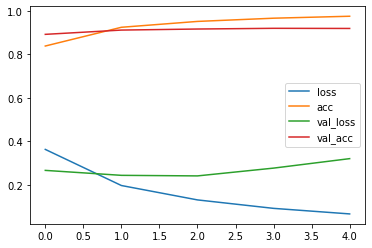

In [74]:
model_loss.plot()

In [77]:
predictions = sentiment_model.predict(X_test)

In [79]:
#predictions

In [80]:
cls_pred = np.array([1.0 if p>0.5 else 0.0 for p in predictions])

In [81]:
cls_pred[:30]

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,cls_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6825
           1       0.93      0.93      0.93      8471

    accuracy                           0.92     15296
   macro avg       0.92      0.92      0.92     15296
weighted avg       0.92      0.92      0.92     15296

